In [286]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.constants import N_A


In [287]:
def model(t, z, alpha1, alpha2, beta):

    dA1 = 2*alpha1*(1-z[0]-2*z[1])*(beta - z[0] - z[1]) - z[0] - alpha2*z[0]*(1-z[0]-2*z[1]) + 2*z[1]
    dA2 = alpha2*z[0]*(1-z[0]-2*z[1]) - 2*z[1]

    return [dA1, dA2]

def model1(t, z, alpha1, beta):

    return alpha1*(beta-z)*(1-z) + z

In [288]:
tstart = 1e-10*1e-4
epsilon = 1e-2
tend = 1000 #5*(1e-2)**-2
tspan = [tstart, tend]
t = np.geomspace(tstart, tend, 500)
z0 = [0, 0]
alpha1 = 1
beta = 1e-2
sns.despine()
alpha2 = 1e4
beta_hat = beta*(epsilon**2)
alpha2_hat = alpha2*(epsilon**2)

z = solve_ivp(model, tspan, z0, method='Radau', t_eval=t, args=(alpha1, alpha2, beta))
#z0 = [0]
#z = solve_ivp(model1, tspan, z0, method='Radau', atol = 1e-6, rtol = 1e-4,  t_eval=t, args=(alpha1, beta))
#print(z.message)

<Figure size 640x480 with 0 Axes>

In [289]:

def A2_out(t):

    return (1- np.exp((2*beta-1)*epsilon*t))/(1- 2*np.exp((2*beta-1)*epsilon*t))

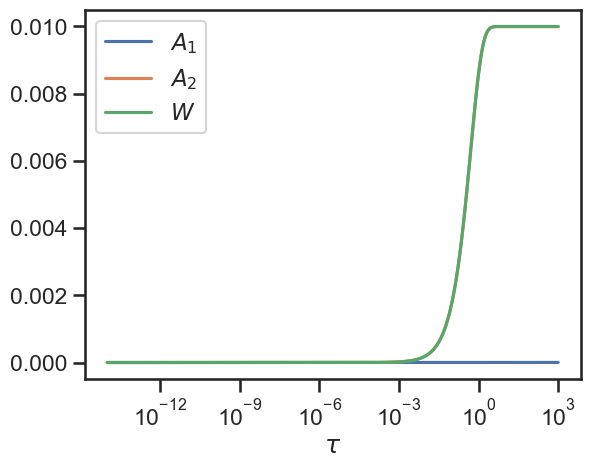

In [290]:
epsilon = 1e-2
delta = 2*epsilon
#mu = 2*alpha1*beta_hat/alpha2_hat
#print(mu)
#eta = 0.5*(mu - np.sqrt(mu**2 +4*mu))
#lmda = -eta
#A = 0.5*(1-lmda)
#print(A)
#value = delta**2/(4*np.abs(beta_hat))
#value = delta*np.sqrt(beta_hat)/2
#value = delta**(4/3)*((1/(2**4))**(1/3))
plt.plot(t, z.y[0], label = r'$A_1$')
plt.plot(t, z.y[1], label = r'$A_2$')
plt.plot(t, z.y[0] + z.y[1], label = r'$W$')
#plt.plot(t, A*np.ones_like(t))
#plt.plot(t, value*np.ones_like(t))
#plt.plot(t, (epsilon**2)*(2*(1+2*t)/(1-4*t)))
#plt.plot(t, 2*t)
#plt.plot(t, A2_out(t))
#plt.plot(t, (epsilon**2)*2*A2_out(t)/(1 - 2*A2_out(t)))
#plt.plot(t, (epsilon**3)*2*(t*(epsilon**-1)))
#plt.plot(t, 2*(epsilon**3)*np.ones_like(t))
#plt.plot(t, 2*(epsilon**3)*(1 + 2*t))
#plt.plot(t, 0.5*(1-np.exp(-4*t*(epsilon**(-1)))))
#plt.plot(t, (epsilon**2)*2*((t*(epsilon**-2)) + np.exp(-(t*(epsilon**-2))) - 1))
#plt.plot(t, 2*(t))
#plt.plot(t, (1 - np.exp(-(t/1e-2)))-z.y[0])
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel(r"$\tau$")
plt.show()

/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_30774/2632151696.py:2: RuntimeWarning: invalid value encountered in log
  return 2 + x + 4*mu*np.log(1- (x/2*mu))


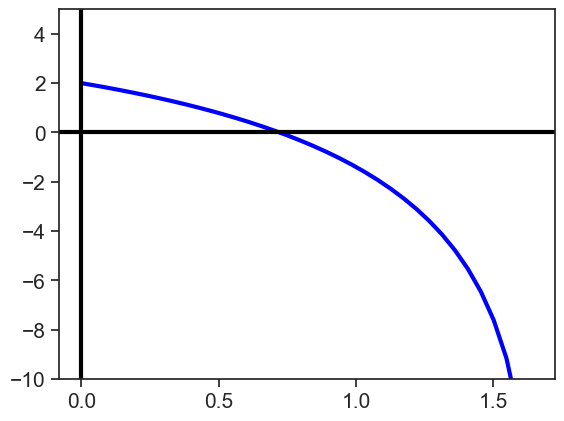

In [296]:
def p(x, mu):
    return 2 + x + 4*mu*np.log(1- (x/2*mu)) 

sns.set_theme()
x = np.linspace(0,2.3)
sns.despine(offset=10, trim=True)
sns.set_style("ticks")
plt.plot(x,  p(x, 1.2), lw=3, c='blue')
plt.axhline(0, c='black', lw=3)
plt.axvline(0, c='black', lw=3)
plt.tick_params(labelsize=15)
plt.ylim([-10, 5])
plt.show()